In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df=pd.read_excel('/content/drive/MyDrive/Compile_Label_Data.xlsx')

In [ ]:
df.head()

,Lemma,Label
0,Video show Nancy Pelosi say give shoot kill ...,1
1,George Soros ban Russia Pakistan Turkey Hung...,1
2,U N call decriminalize sex minor,1
3,Scientists struggle understand Antarctica wa...,1
4,La Reserva Federal present su nuevo sistema ...,1


In [ ]:
import pandas as pd
import re
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df["Lemma"] = df["Lemma"].apply(lambda x: x.lower())
df["Lemma"] = df["Lemma"].apply(lambda x: re.sub(r"[^\w\s]", "", x))






In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

In [ ]:
x=df['Lemma']
y=df['Label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(penalty='l1',C=0.28,solver='saga',max_iter=1000)
LR.fit(xv_train,y_train)

LogisticRegression(C=0.28, max_iter=1000, penalty='l1', solver='saga')

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.6139930937058546

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55     11777
           1       0.62      0.71      0.66     13707

    accuracy                           0.61     25484
   macro avg       0.61      0.61      0.61     25484
weighted avg       0.61      0.61      0.61     25484



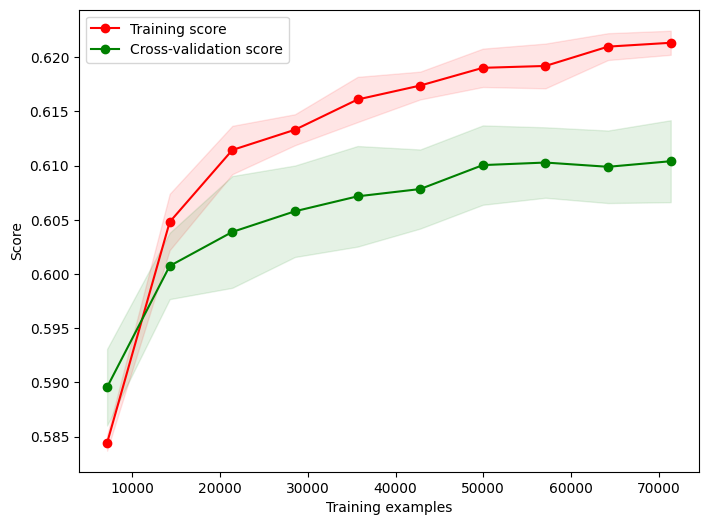

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


estimator = LogisticRegression(penalty='l1', C=0.28, solver='saga', max_iter=1000)
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(estimator, xv_train, y_train, cv=5, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()